# Final Project

**Họ và tên thành viên 1:** Trần Tuấn Đạt

**MSSV:** 18120313

**Họ và tên thành viên 2:** Bùi Trọng Hoàng

**MSSV:** 18120385

---

## Thư viện sử dụng

In [1]:
import pandas as pd
import numpy as np

# Dùng để in array numpy đầy đủ hơn
import sys  
np.set_printoptions(threshold=sys.maxsize)

# Dùng để đo thời gian chạy code
import time

## Chú thích

1. Phim

Để cho ngắn gọn, thì mỗi dòng của dữ liệu sẽ được gọi là một dòng 'phim'

Điều này để rút gọn giữa Movie hay TV Show

Trong trường hợp cụ thể thì sẽ gọi một dòng là Movie hoặc TV Show (Shơw)

---

# I. Thu thập dữ liệu

Dữ liệu: Netflix Movies and TV Shows

Mô tả dữ liệu:

- Tập hợp dữ liệu tất cả các TV Shows và phim trên nền tảng Netflix. Được cập nhật hàng tháng


Nguồn dữ liệu:

- Link: https://www.kaggle.com/shivamb/netflix-shows

- Nguồn sinh dữ liệu: Flixable

- Phương pháp thu thập: Regular API calls

- Chủ sỡ hữu Dataset: Shivam Bansal

Thông tin phiên bản của bộ dữ liệu: 
- Expected update frequency: Quarterly
- Last updated: 2021-09-27
- Date created: 2019-12-04
- Current version: Version 5


Thông tin về quyền sử dụng:

- License: CC0: Public Domain

    You can copy, modify, distribute and perform the work, 
    even for commercial purposes, all without asking permission.
    
 https://creativecommons.org/publicdomain/zero/1.0/


In [3]:
df = pd.read_csv('Data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


---

# II. Khám phá dữ liệu

### 1. Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

#### Số cột 

In [4]:
n_cols = len(df.columns)
n_cols

12

#### Số dòng

In [5]:
n_rows = df.shape[0]
n_rows

8807

### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không? Dữ liệu có các dòng bị lặp không?

#### Mỗi dòng có ý nghĩa gì?

Mỗi dòng là đại diện cho một bộ phim hoặc một TV show

Chỉ có một dòng đầu tiên là chứa các tên cột, còn không có dòng lạc loài trong phần còn lại của dữ liệu

#### Dữ liệu có các dòng bị lặp không?

In [6]:
# True = 1, False = 0, nên ta sum cột này lại, nếu = 0 thì không có dòng trùng
res = df.duplicated().sum()

#kết quả là không có dòng trùng nhau
res > 0


False

### 3. Mỗi cột có ý nghĩa gì? Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

#### Mỗi cột có ý nghĩa gì?

Theo mô tả bộ dữ liệu tại nguồn

- **'show_id'** : Mã id của phim

- **'type'**: Loại của phim là Movie hay TV Show

- **'title'**: Tên phim

- **'director'**: Đạo diễn của phim

- **'cast'**: Diễn viên của phim

- **'country'**: Nước sản xuất

- **'date_added'**: Ngày được thêm vào bộ dữ liệu

- **'release_year'**: Năm sản xuất của phim

- **'rating'**: Phân loại đối tượng xem của phim (PG-13, TV-MA,..)

- **'duration'**: Thời lượng của phim

- **'listed_in'**: Thể loại của phim

- **'description'**: Mô tả sơ bộ của phim
     

#### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Các cột dữ liệu đều có kiểu String, chỉ riêng cột release_year là kiểu số nguyên

Điều này là bình thường không có dữ liệu không phù hợp

Cột date_added có kiểu String, nhưng hiện tại chưa có mục đích xử lý nên không chuyển sang kiểu Datetime

Nếu cần sẽ chuyển sang kiểu Datetime trong phần tiền xử lý cho câu hỏi riêng

### 4. Numerical

#### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Cột numerical có hai cột *release_year* và cột *date_added*, nên ta sẽ khảo sát hai cột này.

Nhưng hiện tại cột *date_added* đang có kiểu dữ liệu là **string** nên ta cần phải chuyển về dưới dạng **datetime** để tiến hành khảo sát

#### Chuyển cột *date_added* về kiểu datetime

In [8]:
def convertDateTime(date):
    try:
        return pd.to_datetime(date,format="%B %d, %Y")
    except:
        return np.nan
date_add = df['date_added'].apply(convertDateTime)
df['date_added'] = date_add

In [9]:
# cột numerical là cột release_year và cột date_added ta sẽ khảo sát hai cột này
rls_col = df['release_year']
date_add = df['date_added']

#### Số-lượng/tỉ-lệ các giá trị thiếu?

In [10]:
n_year_missing = rls_col.isna().sum()# == 0
ratio_year_missing = n_year_missing * 100 / len(rls_col) #== 0

n_date_missing = date_add.isna().sum()#==98
ratio_date_missing = n_date_missing * 100 / len(date_add)#== 1.11275

Cột *release_year* **không có** giá trị nào bị thiếu, tỉ lệ giá trị bị thiếu là **0%**

Cột *date_added* có **98** giá trị bị thiếu, tỉ lệ giá trị bị thiếu là **1.11275%**

#### Min? max? → Có gì bất thường không?

In [11]:
year_earliest = rls_col.min() #1925
date_earliest = date_add.min()#Timestamp('2008-01-01 00:00:00')

In [12]:
year_latest = rls_col.max() #2021
date_latest = date_add.max()#Timestamp('2021-09-25 00:00:00')

<AxesSubplot:xlabel='release_year'>

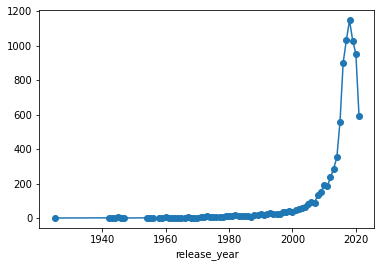

In [13]:
df.groupby(['release_year']).size().plot(marker='o')

In [14]:
df.groupby(['release_year']).size()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Length: 74, dtype: int64

<AxesSubplot:xlabel='date_added'>

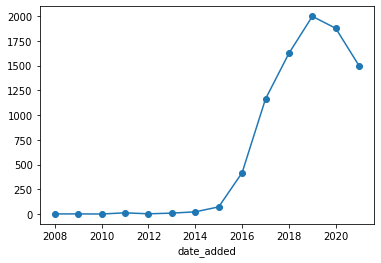

In [15]:
df.groupby(df['date_added'].dt.year).size().plot(marker='o')

In [16]:
df.groupby(df['date_added'].dt.year).size()

date_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
dtype: int64

Không có gì bất thường.

Các giá trị của cột *release_year* được phân bố từ năm 1925 đến năm 2021, các giá trị tập trung với mật độ cao từ năm 2000 đến 2020 và cao nhất là năm 2018 với **1147** bộ phim được sản xuất.

Các giá trị của cột *date_added* được phân bố từ ngày 01/01/2008 đến 25/09/2021, cao nhất là vào 2019 với **1999** bộ phim được thêm vào Netflix

### 5. Categorical

#### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

In [17]:
categorical_df = df.drop('release_year', axis=1)
categorical_df = categorical_df.drop('date_added', axis = 1)

#### Số lượng các giá trị khác nhau? Show một vài giá trị → Có gì bất thường không?

In [18]:
categorical_df.agg([pd.Series.nunique, pd.Series.unique])

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
nunique,8807,2,8807,4528,7692,748,17,220,514,8775
unique,"[s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...","[Movie, TV Show]","[Dick Johnson Is Dead, Blood & Water, Gangland...","[Kirsten Johnson, nan, Julien Leclercq, Mike F...","[nan, Ama Qamata, Khosi Ngema, Gail Mabalane, ...","[United States, South Africa, nan, India, Unit...","[PG-13, TV-MA, PG, TV-14, TV-PG, TV-Y, TV-Y7, ...","[90 min, 2 Seasons, 1 Season, 91 min, 125 min,...","[Documentaries, International TV Shows, TV Dra...","[As her father nears the end of his life, film..."


Kết luận: không có gì bất thường 

    vì có đúng 8807 giá trị id khác nhau, có 2 loại phim là Movie và TV Show, 
    các cột còn lại không có cột số lượng unique vượt số dòng thực

    tuy nhiên, cột description bị thiếu giá trị ở một vài dòng
    cột director, cast, country, rating, duration có nhiều giá trị trùng nhau, hoặc bị khuyết

#### Số giá trị bị thiếu và tỉ lệ giá trị bị thiếu

In [19]:
categorical_missing_value = categorical_df.agg([pd.Series.isna], axis=1).sum()
categorical_missing_ratio = categorical_missing_value * 100 / n_rows

In [20]:
categorical_missing_value

show_id           0
type              0
title             0
director       2634
cast            825
country         831
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [21]:
categorical_missing_ratio

show_id         0.000000
type            0.000000
title           0.000000
director       29.908028
cast            9.367549
country         9.435676
rating          0.045418
duration        0.034064
listed_in       0.000000
description     0.000000
dtype: float64

Những cột có giá trị thiếu là *director, cast, country, rating, duration*, tỉ lệ giá trị bị thiếu đạt cao ở cột *director* với tỉ lệ **29.908028%**, các cột *show_id, type, title, listed_in, description* không có giá trị nào bị mất.

# III. Đưa ra câu hỏi để trả lời

## 1. Đề xuất phim tương tự dựa trên diễn viên của phim đó

---

*Ứng dụng 1: Cho tên phim + dàn diễn viên -> đề xuất phim tương tự*
    
**Nó sẽ lợi hơn việc tìm kiếm đơn thuần (tìm phim có 1 diễn viên A đóng) ở các điểm:**
    
- Đề xuất này dựa trên độ tương tự trên nhiều diễn viên, khả năng liên quan cao hơn. Tìm kiếm đơn thuần chỉ đưa ra những bộ phim có cùng người đóng, hạn chế vì mỗi phim diễn viên sẽ khác nhau, khó tìm). Mặt khác, cho máy tính làm, không phải tìm bằng mắt.  
- Chọn ra top 5 phim có độ liên quan cao nhất, thay vì nhận 1 list kết quả từ tìm kiếm đơn thuần
- Có lợi cho nền tảng chiếu phim, giữ được người dùng trên nền tảng mình lâu hơn vì toàn đề xuất phim mà người dùng thích xem, có người xem phim vì thích có 1/1 nhóm diễn viên đó tham gia. Có lợi cho người xem vì được đễ xuất tốt hơn thay vì tự tìm kiếm trong CSDL lớn

### 1.1 Tiền xử lý

Tiền xử lý có 2 công việc đơn giản:

B1: Dùng copy() để làm việc riêng trên dataframe copy dfa1

B2: Điền các dòng NaN của cột cast bằng " " (khoảng trắng)


In [22]:
dfa1 = df.copy() #handleon copy first

#Are there NaN values in Cast columns? If there are, filling the space " " instead NaN
dfa1["cast"].isna().sum()
dfa1["cast"] = dfa1["cast"].fillna(" ")
dfa1["cast"].head(5)


0                                                     
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
Name: cast, dtype: object

---

### 1.2 Phân tích dữ liệu để trả lời

#### 1.2.1 Mô tả cách làm

#RUN FIRST

B1: Đầu tiên cài đặt các hàm công cụ và chuẩn bị dữ liệu    
    
B2: Ta tính ma trận độ tương tự và ma trận khoảng cách cho 1 dòng, so với các dòng còn lại trong DF

    Độ tương tự = số diễn viên giống nhau giữa 1 dòng và các dòng còn lại trong DF

    Giả định cột diễn viên có không quá 100 phần tử 1 dòng
    
    Điểm khoảng cách = 100 - Độ tương tự
    
B3: Lấy ra top 5 phim có điểm khoảng cách thấp nhất (tương tự nhất)

    Sử dụng hàm argsort để lấy ra chỉ số vị trí luôn
    
    APPLY ON DATA
        
        Sau khi code được hàm xử lý với 1 dòng

        Apply trên pd.Series bằng apply()

B4: Nối cột mới vào DF

    

#Để TỐI ƯU tốc độ hơn, mình sẽ làm 3 việc

Việc 1: Tách hàm

    Tách hàm tính array length riêng, còn hàm suggestFilmOnCast chỉ nhận arraylen rồi trả về film thôi
    Nghĩa là có thể dùng theo kiểu khi nào người dùng xem phim nào thì mới tính riêng cho phim đó,
    và có thể tính 1 phần chứ không toàn bộ

Việc 2: Dòng nào trống, thì mình skip, vì tính độ tương tự là vô nghĩa
    
    dummy handle: thay vì bỏ trống, mình lấy 5 bộ phim đầu tiên trong dataframe
    một cách xử lý khác, là kết hợp với các lựa chọn recommend khác nữa (đạo diễn, ratings,..)
    
Việc 3: Rút bớt các hàm tính toán ra 1 mục là chuẩn bị dự liệu để tránh việc tính toán bị lặp lại
    
    Đã kiểm nghiệm, tốc độ khi APPLY ON DATA tăng đáng kể vì rút bớt các hàm apply trên toàn bộ dữ liệu
    --- 34.65652775764465 seconds --- (dưới 1 phút) so với
    --- 150.8246557712555 seconds --- (2 phút rưỡi) khi thay data_in_set bằng data0.apply(set).values
    
#GIẢ ĐỊNH

Giả định 1

    Việc dùng set để loại bỏ duplicate, nên sẽ có 1 số dòng, có ít hơn 5 bộ phim
    Giả định này có thể chấp nhận được, vì không còn phim tương tự trong dữ liệu, giải quyết như Việc 2 ở trên
Giả định 2

    Do đã tiền xử lý, với mỗi dòng s trong df['cast'] chỉ kiểm tra s == ' ' thôi
Giả định 3

    Cột diễn viên có không quá 100 phần tử 1 dòng


#### 1.2.2 Cài đặt

**Bước 1:** Cài đặt các hàm công cụ và chuẩn bị dữ liệu

In [23]:
def calc_distance(s):
    return 100 - len(s)

# Set up for suggestFilmOnCast, this helps avoid duplicated calculations
data0 = dfa1['cast'].str.split(',')
data_in_set = data0.apply(set).values
length_checker = np.vectorize(calc_distance)
film_names = dfa1['title']
first_5_films = set(film_names.values[:5])

**Bước 2:** Tính ma trận độ tương tự và ma trận khoảng cách cho dữ liệu

In [24]:
def calc_similarity_arr(s):
    #for optimizing
    if s == ' ':        #if string is empty
        return []
    
    list1 = s.split(',')
    
    #find intersection between list1 and whole data using broadcast
    #return the names exist in both 2 list
    commonNames = set(list1) & data_in_set
    
    #return the count on each row of 'res'
    arr_len = length_checker(commonNames)
    
    return arr_len

Áp dụng lên toàn bộ dữ liệu, kết hợp hàm time() để đo thời gian chạy

In [25]:
start_time = time.time()

sim_arr = dfa1['cast'].apply(calc_similarity_arr)

print("--- %s seconds ---" % (time.time() - start_time))

--- 72.6586229801178 seconds ---


**Bước 3:** Truy ra tên phim từ ma trận độ tương tự

In [25]:
def suggestFilmOnCast(arr_len):
    #for optimizing
    if len(arr_len)==0:   #if array is empty
        return first_5_films
    
    #return top 5 names with the highest similarity
    res_of_name = film_names.values[arr_len[arr_len.argsort()[:5]]]
    
    #remove duplicated name
    final_res = set(res_of_name)
    return final_res


Kiểm tra thử 1 dòng

In [26]:
suggestFilmOnCast(calc_similarity_arr(dfa1['cast'].iloc[0]))

{'Blood & Water',
 'Dick Johnson Is Dead',
 'Ganglands',
 'Jailbirds New Orleans',
 'Kota Factory'}

Áp dụng cho dữ liệu

In [27]:
suggest_arr = sim_arr.apply(suggestFilmOnCast)
suggest_arr

0       {Ganglands, Dick Johnson Is Dead, Blood & Wate...
1           {Tobot Galaxy Detectives, Kate, On the Verge}
2       {The Women and the Murderer, On the Verge, Oct...
3       {Ganglands, Dick Johnson Is Dead, Blood & Wate...
4                          {On the Verge, Into the Night}
                              ...                        
8802    {Paradise Hills, On the Verge, Octonauts: Abov...
8803    {Ganglands, Dick Johnson Is Dead, Blood & Wate...
8804                                 {On the Verge, JJ+E}
8805           {The Women and the Murderer, On the Verge}
8806                       {On the Verge, Into the Night}
Name: cast, Length: 8807, dtype: object

**Bước 4:** Thêm 1 cột mới vào DF, là cột SuggestOnCast

In [28]:
pre_merge_col = suggest_arr.to_frame()
pre_merge_col = pre_merge_col.rename(columns = {'cast':'SuggestOnCast'})
pd.concat([dfa1, pre_merge_col], axis = 1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,SuggestOnCast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","{Ganglands, Dick Johnson Is Dead, Blood & Wate..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","{Tobot Galaxy Detectives, Kate, On the Verge}"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"{The Women and the Murderer, On the Verge, Oct..."
3,s4,TV Show,Jailbirds New Orleans,NaN,,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","{Ganglands, Dick Johnson Is Dead, Blood & Wate..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"{On the Verge, Into the Night}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","{Paradise Hills, On the Verge, Octonauts: Abov..."
8803,s8804,TV Show,Zombie Dumb,NaN,,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...","{Ganglands, Dick Johnson Is Dead, Blood & Wate..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"{On the Verge, JJ+E}"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","{The Women and the Murderer, On the Verge}"


## 2. Trong 3 năm gần đây, Netflix đã công chiếu 5 thể loại phim nào nhiều nhất và 10 bộ phim mới nhất thuộc những thể loại đó?

*Ứng dụng 2: Đề xuất những bộ phim mới nhất thuộc những thể loại hay nhất trên Netflix cho người dùng.*
    
**Điều này sẽ giúp cho người dùng:**
    
- Đề xuất cho người dùng những phim mới có thể sẽ chất lượng hơn do thuộc về những thể loại đang được quan tâm.
    
- Chọn ra top 10 phim mới nhất, thay vì nhận 1 list kết quả từ tìm kiếm đơn thuần
    
- Có lợi cho nền tảng chiếu phim, giữ được người dùng trên nền tảng mình lâu hơn vì toàn đề xuất phim mà người dùng có thể thích xem (nhiều người dùng thích xem 1 số thể loại phim nhất định). Có lợi cho người xem vì được đễ xuất tốt hơn thay vì tự tìm kiếm trong CSDL lớn

---

### 2.1 Tiền xử lý

Lấy ra dữ liệu của 3 năm gần nhất

In [24]:
from_year = list(sorted(set(df['release_year'])))[-1] - 3 + 1 
to_year = list(sorted(set(df['release_year'])))[-1]
data = df[df['release_year'].between(from_year, to_year)]
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Vì các thể loại phim được lưu dưới kiểu *string* nên ta cần phải tìm cách tách từng thể loại phim.

In [25]:
listFilmType = data['listed_in'].str.split(", ", expand = False).explode().to_frame()
listFilmType.head()

,listed_in
0,Documentaries
1,International TV Shows
1,TV Dramas
1,TV Mysteries
2,Crime TV Shows


---

### 2.2 Phân tích dữ liệu để trả lời

#### 2.2.1 Mô tả cách làm

- Tính số lần xuất hiện của mỗi thể loại phim trong 3 năm gần đây.
- Sắp xếp lại dataframe dựa trên số lần xuất hiện của các thể loại phim.
- Lấy ra 5 thể loại nổi bật nhất
- Xác định những bộ phim thuộc những thể loại phim nổi bật nhất
- Sắp xếp lại dựa trên ngày **date_added**
- Group dữ liệu theo cột **listed_in** và chọn ra 10 bộ phim mới nhất

#### 2.2.2 Cài đặt

**Tính số lần xuất hiện của mỗi thể loại phim trong 3 năm gần đây.**

In [18]:
numberShow = listFilmType.groupby('listed_in', as_index=False).size()

**Sắp xếp lại dataframe dựa trên số lần xuất hiện của các thể loại phim.**

In [43]:
list_type = numberShow.sort_values(by=['size'], ascending=False)


Biểu đồ về số lượng các bộ phim của các thể loại trong thời gian 3 năm gần đây

<AxesSubplot:>

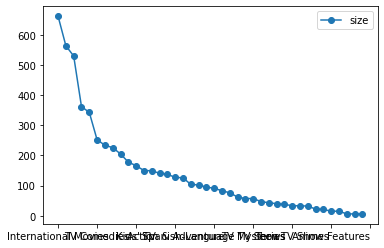

In [44]:
graph = pd.DataFrame()
graph.index = list(list_type['listed_in'])
graph['size'] = list(list_type['size'])
graph.plot(marker='o')

**Lấy ra 5 thể loại nổi bật nhất**

In [45]:
list_5_type = list_type.head(5)['listed_in'].values
list_5_type

array(['International Movies', 'International TV Shows', 'Dramas',
       'Comedies', 'TV Dramas'], dtype=object)

**Xác định những bộ phim thuộc những thể loại phim nổi bật nhất**

In [46]:
data['listed_in'] = data['listed_in'].str.split(", ", expand = False)
explode_data = data.explode('listed_in')
explode_top_data = explode_data[explode_data['listed_in'].apply(lambda x: x in list_5_type)]

/tmp/ipykernel_3506/3528954873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['listed_in'] = data['listed_in'].str.split(", ", expand = False)


**Sắp xếp lại dựa trên ngày *date_added*.**

In [22]:
explode_top_data = explode_top_data.sort_values(['listed_in', 'date_added'], ascending=False)

**Group dữ liệu theo cột *listed_in* và chọn ra 10 bộ phim mới nhất**

In [23]:
explode_top_data.groupby('listed_in').head(10)[['listed_in','title']]

,listed_in,title
1,TV Dramas,Blood & Water
5,TV Dramas,Midnight Mass
15,TV Dramas,Dear White People
17,TV Dramas,Falsa identidad
33,TV Dramas,Squid Game
49,TV Dramas,Castle and Castle
82,TV Dramas,Lucifer
92,TV Dramas,Into the Night
99,TV Dramas,On the Verge
108,TV Dramas,Dive Club


Có thể thấy được rằng, các năm gần đây các bộ phim và chương trình truyền hình quốc tế đang ngày càng trở nên phổ biến, có thể là do sự gia tăng của các số người đăng ký sử dụng Netflix đang gia tăng rất nhiều trong những năm gần đây theo dữ liệu về số lượng người đăng ký trong những năm gần đây theo trang số liệu của [statista](https://www.statista.com/statistics/250934/quarterly-number-of-netflix-streaming-subscribers-worldwide/) nên đã thu hút sự quan tâm của việc sản xuất của các chương trình quốc tế để đáp ứng các nhu cầu đang ngày càng cao của đại đa số bộ phận người dùng Netflix trên toàn cầu.

Bên cạnh đó, ta cũng thấy được các nhà làm phim cũng đang dần chuyển sự quan tâm của mình qua các thể loại hài kịch, những bộ phim dramas, có thể phù hợp với nhiều độ tuổi khác nhau trên thế giới.

---

## IV. Nhìn lại quá trình làm đồ án

### 1. Trần Tuấn Đạt - 18120313

### 1.1 Những khó khăn đã gặp phải

- Khi bắt đầu, nhóm có chọn bộ dữ liệu theo chủ đề **Y học**, nhưng vì bộ dữ liệu đó hơi khó xử lý, nên nhóm đã tìm sang những chủ đề khác. 
- Vì dữ liệu thể loại của các bộ phim được lưu dưới dạng list nên sẽ gây khó khăn trong việc xác định các thể loại của phim
- Field **date_added** vốn được nhập vào kiểu *String* nên cần phải chuyển lại về kiểu dữ liệu *datetime* để có thể xử lý.
- Đặt ra câu hỏi cho bộ dữ liệu được truyền vào
- Việc xử lý các dữ liệu của field **rating** còn gặp khó khăn vì chưa xác định được tiêu chí đánh giá của Netflix

### 1.2 Những điều đã học được

- Tìm được cách để có thể lấy các bộ dữ liệu được cung cấp trên các trang web như [kaggle](https://www.kaggle.com/),...
- Biết cách đọc và xử lý các thông tin được truyền vào
- Xử lý được vấn đề khi mà dữ liệu trong Dataframe được lưu trữ dưỡi dạng List
- Tìm được cách để có thể so sánh độ giống như giữa hai List.
- Chuyển được dữ liệu từ kiểu *String* sang kiểu *datetime*
- Hiểu hơn về thư viện **pandas**

### 1.3 Nếu được cho thêm thời gian, nhóm sẽ làm gì?

- Trong bộ dữ liệu đã cho, field **director** còn bị thiếu ở một số dòng, nhóm sẽ tìm cách để có thể điền thông tin của **director**.
- Tìm cách đề xuất những bộ phim thuộc cho những người dùng thuộc một lứa tuổi nhất định.
- Những lứa tuổi nào sẽ thích hợp với những thể loại phim nào?

### 2. Bùi Trọng Hoàng - 18120385

### 2.1 Những khó khăn đã gặp phải

- Em gặp khó khăn về tìm kiếm ý tưởng của câu hỏi, vì dữ liệu không có nhiều cột numerical
- Một khó khăn khác là vì hầu hết các cột đều là String, nên xử lý bằng numpy không được, dẫn đến tốc độ chậm
- Git Merge và Revert

### 2.2 Những điều đã học được

- Vì học chuyên ngành phần mềm nên hầu hết mọi điều trong môn này là mới mẻ với em, mục đích em đăng kí môn học cũng là tìm môn học gì đó khác với đa số môn phần mềm mà em đang học
- Em thích câu "Stopping to sharpen your tools" vì nó giúp em tốt hơn không chỉ trong môn này mà nhiều lĩnh vực khác trong cuộc sống
- Bớt coi thường các Data Scientist hơn 100 lần

### 2.3 Nếu có thêm thời gian thì sẽ làm gì?

- Em nghĩ nếu có thêm thời gian thì sẽ mô hình hóa dữ liệu nhiều hơn, có thể sẽ tìm ra các câu hỏi hay hơn

---

## V. Tài liệu tham khảo

### 1. Trần Tuấn Đạt - 18120313

- [Thư viện pandas](https://pandas.pydata.org/docs/reference/)
- [Thư viện numpy](https://numpy.org/doc/stable/reference/)
- [Stack Overflow](https://stackoverflow.com/)

### 2. Bùi Trọng Hoàng - 18120385

- Dữ liệu: Kaggle.com


- Ý tưởng câu hỏi
https://www.kaggle.com/omeryasirkucuk/content-based-recommendation-w-netflix-dataset
    
    chỉ tham khảo ý tưởng về câu hỏi, bên trong họ làm bằng sklearn, không sao chép

- Ngoài ra:
    
    Stackoverflow
    
    GeeksForGeeks
    
    Pandas Docs
    
    Numpy Docs
    
    Google
    